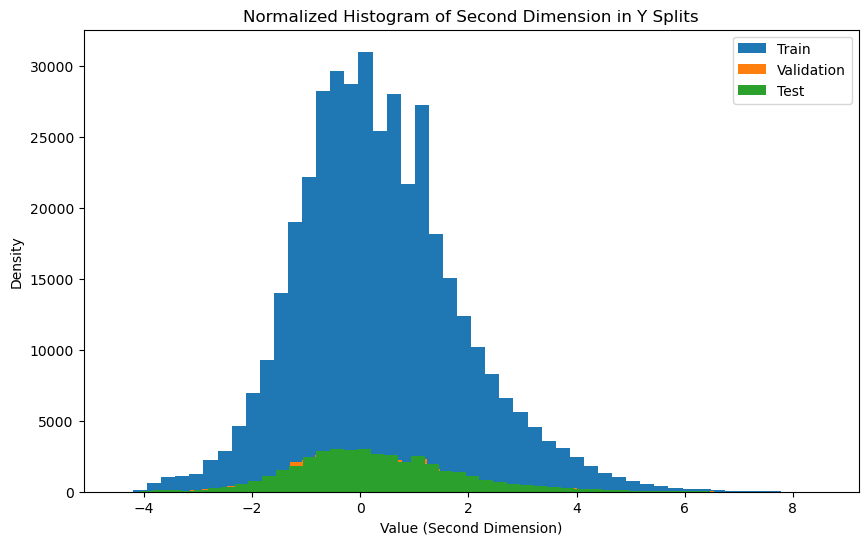

In [20]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

def plot_expression_distribution(h5_path, pairs=False):
    # Open the HDF5 file
    with h5py.File(h5_path, 'r') as f:
        Y_train = f['Y_train'][:]
        Y_val = f['Y_valid'][:]
        Y_test = f['Y_test'][:]

    # Extract the second dimension
    Y_train_second = Y_train[:, 1]  # really only plotting the housekeeping
    Y_val_second = Y_val[:, 1]
    Y_test_second = Y_test[:, 1]

    # this would be for developmental
    Y_train_second = Y_train[:, 0]  
    Y_val_second = Y_val[:, 0]
    Y_test_second = Y_test[:, 0]
    
    plt.figure(figsize=(10, 6))
    plt.hist(Y_train_second, bins=50, density=False, label='Train')
    plt.hist(Y_val_second, bins=50, density=False, label='Validation')
    plt.hist(Y_test_second, bins=50, density=False,  label='Test')
    plt.xlabel('Value (Second Dimension)')
    plt.ylabel('Density')
    plt.title('Normalized Histogram of Second Dimension in Y Splits')
    plt.legend()
    plt.show()

h5_path = "/grid/koo/home/duran/D3-DNA-Discrete-Diffusion/model_zoo/deepstarr/DeepSTARR_data.h5"
plot_expression_distribution(h5_path, pairs=False)

[[1 1]
 [1 1]
 [1 1]
 ...
 [1 0]
 [1 0]
 [0 0]]
[[1 1]
 [1 1]
 [1 1]
 ...
 [1 0]
 [0 1]
 [1 1]]
[[1 1]
 [1 0]
 [1 1]
 ...
 [1 0]
 [1 0]
 [1 0]]


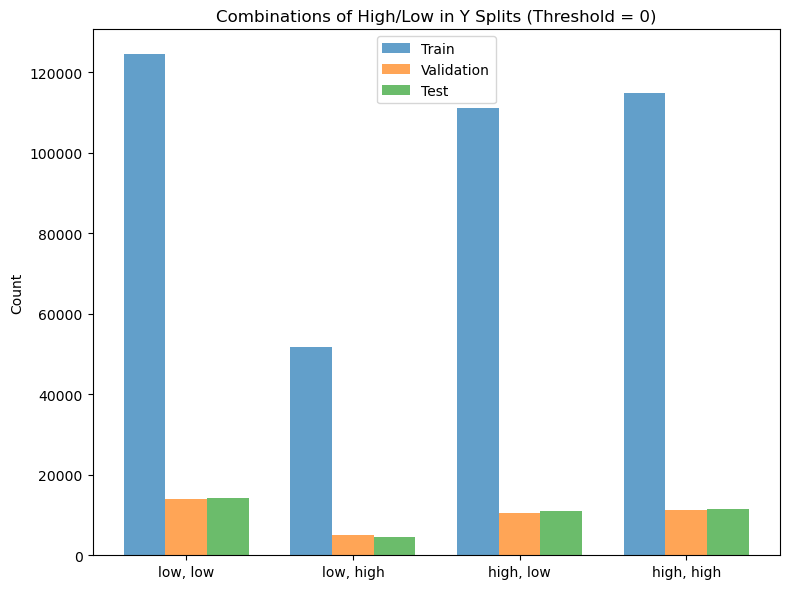

In [19]:
# visualize number of samples that have high-low values
h5_path = "/grid/koo/home/duran/D3-DNA-Discrete-Diffusion/model_zoo/deepstarr/DeepSTARR_data.h5"

# Open the HDF5 file
with h5py.File(h5_path, 'r') as f:
    Y_train = f['Y_train'][:]
    Y_val = f['Y_valid'][:]
    Y_test = f['Y_test'][:]

def count_combinations(Y):
    # Classify as high (>0) or low (<=0)
    high_low = (Y > 0).astype(int)  # 1 for high, 0 for low
    print(high_low)
    # Count combinations
    counts = np.zeros(4, dtype=int)
    for a, b in high_low:
        idx = a * 2 + b  # (0,0)->0, (0,1)->1, (1,0)->2, (1,1)->3
        counts[idx] += 1
    return counts

# Get counts for each split
counts_train = count_combinations(Y_train)
counts_val = count_combinations(Y_val)
counts_test = count_combinations(Y_test)

# Labels for the combinations
labels = ['low, low', 'low, high', 'high, low', 'high, high']

# Plotting
x = np.arange(len(labels))
width = 0.25

plt.figure(figsize=(8, 6))
plt.bar(x - width, counts_train, width, label='Train', alpha=0.7)
plt.bar(x, counts_val, width, label='Validation', alpha=0.7)
plt.bar(x + width, counts_test, width, label='Test', alpha=0.7)
plt.xticks(x, labels)
plt.ylabel('Count')
plt.title('Combinations of High/Low in Y Splits (Threshold = 0)')
plt.legend()
plt.tight_layout()
plt.show()

(775828, 18)
(83826, 18)
(68752, 18)


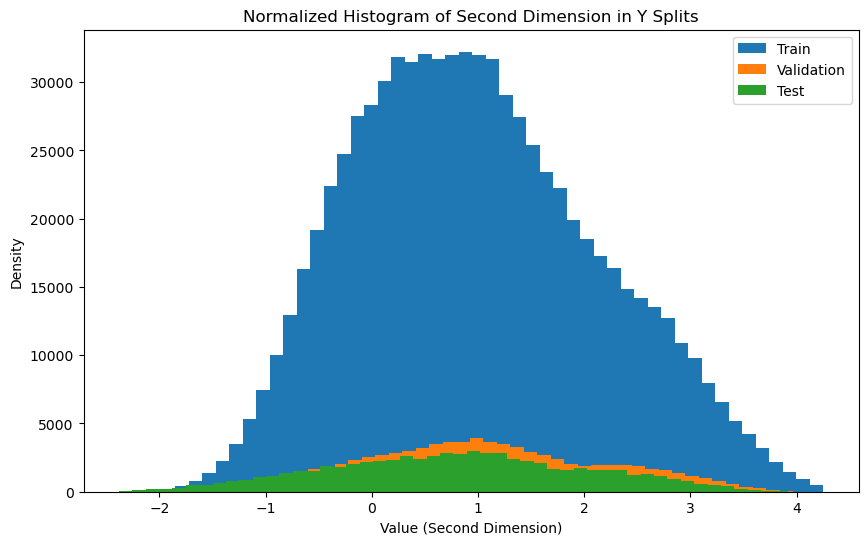

In [17]:
h5_path ="/grid/koo/home/duran/D3-DNA-Discrete-Diffusion/model_zoo/atac_seq/dataset.h5"

with h5py.File(h5_path, 'r') as f:
        Y_train = f['y_train'][:]
        Y_val = f['y_valid'][:]
        Y_test = f['y_test'][:]

print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

 # Extract the second dimension
Y_train_second = Y_train[:, 2]
Y_val_second = Y_val[:, 1]
Y_test_second = Y_test[:, 1]

plt.figure(figsize=(10, 6))
plt.hist(Y_train_second, bins=50, density=False, label='Train')
plt.hist(Y_val_second, bins=50, density=False, label='Validation')
plt.hist(Y_test_second, bins=50, density=False,  label='Test')
plt.xlabel('Value (Second Dimension)')
plt.ylabel('Density')
plt.title('Normalized Histogram of Second Dimension in Y Splits')
plt.legend()
plt.show()

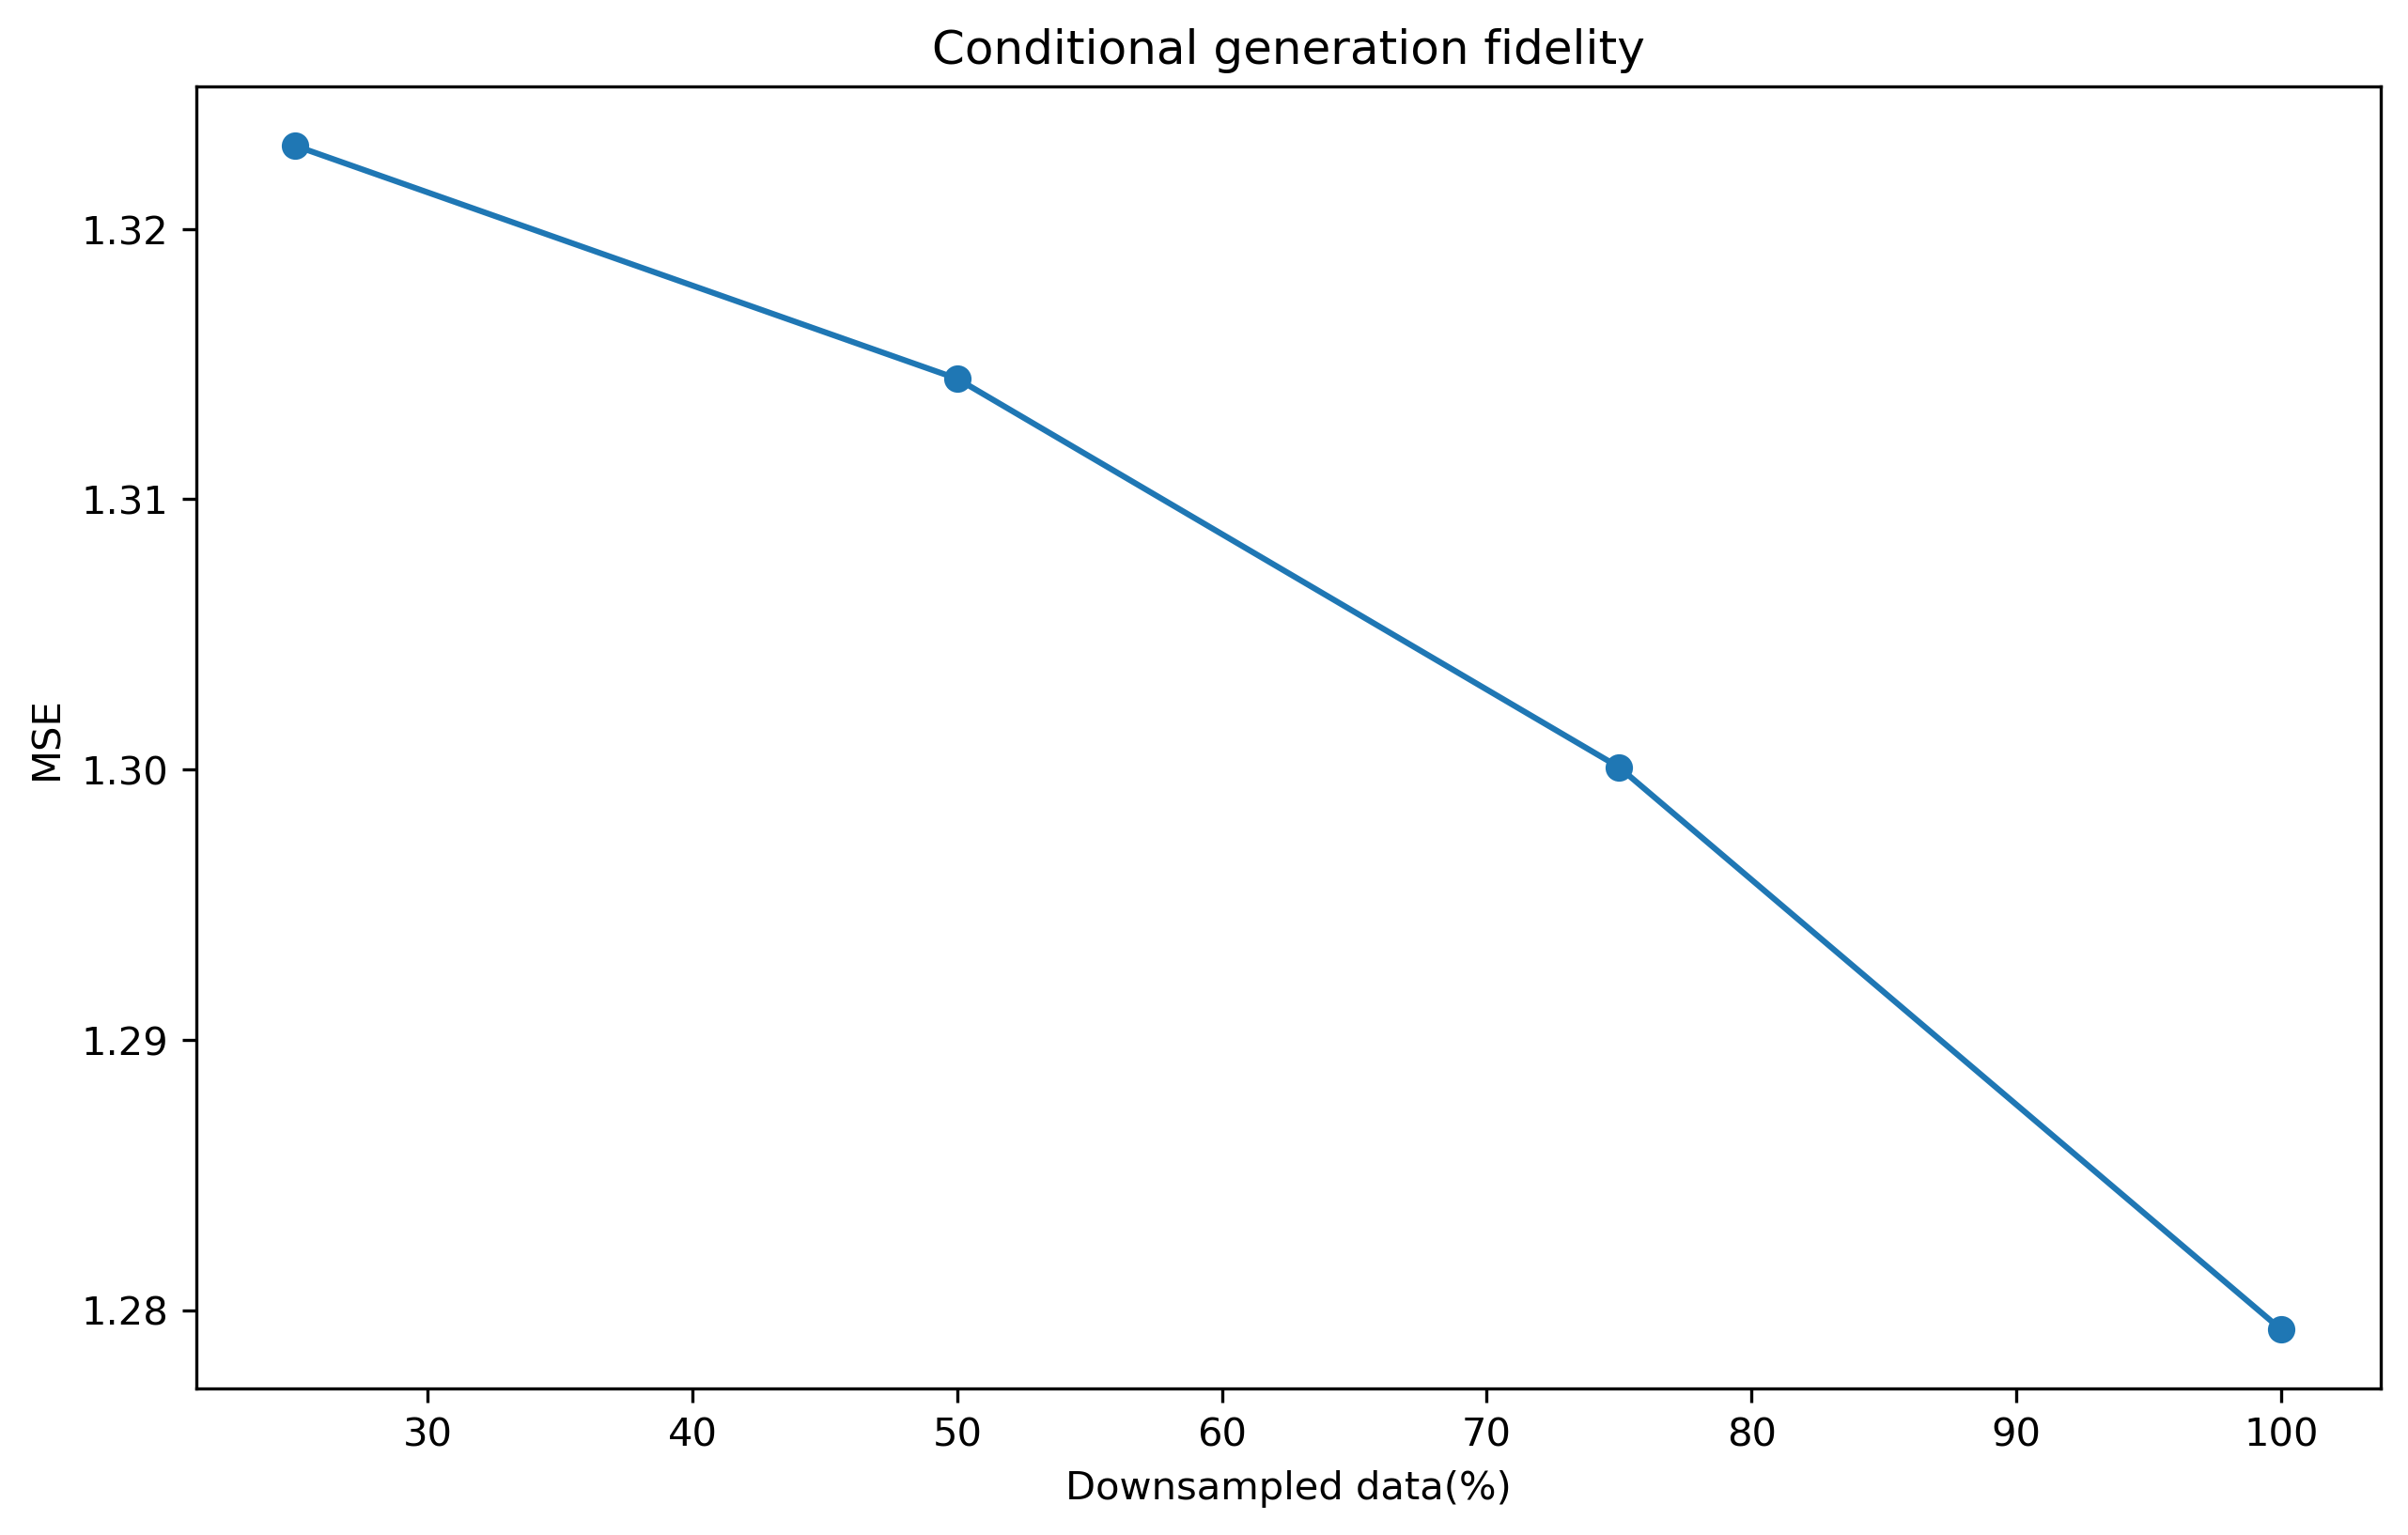

In [1]:
# conditional generation fidelity
# first ablation loss resuts WITH the sc loss - only with one seed, 42
import numpy as np

fractions = np.array([1.0, 0.75, 0.5, 0.25])*100
mse = [1.279284119606018, 1.3000849485397339, 1.3144601583480835, 1.3230793476104736]

#plot
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=300)
plt.plot(fractions, mse, marker='o')
plt.xlabel('Downsampled data(%)')
plt.ylabel('MSE')
plt.title('Conditional generation fidelity')
plt.show()

In [ ]:
# conditional generation fidelity
# second ablation loss resuts WITHOUT the sc loss - two samples for each fraction, all different seeds 



In [10]:
## visualize the context of hte ckpt to retrieve the fraction and seed possibly as a function of the data file


import torch
import pprint

def inspect_checkpoint(checkpoint_path):
    """Load and print the contents of a checkpoint file."""
    
    # Load the checkpoint
    checkpoint = torch.load(checkpoint_path, map_location='cpu')
    
    print("=== CHECKPOINT CONTENTS ===")
    print(f"Checkpoint path: {checkpoint_path}")
    print(f"Type: {type(checkpoint)}")
    print()
    
    if isinstance(checkpoint, dict):
        print("Keys in checkpoint:")
        for key in checkpoint.keys():
            print(f"  - {key}")
        print()
        
        # Print details for each key
        for key, value in checkpoint.items():
            print(f"=== {key} ===")
            if isinstance(value, dict):
                print(f"  Type: dict with {len(value)} keys")
                if len(value) <= 10:  # Only print if not too many keys
                    for subkey, subvalue in value.items():
                        if hasattr(subvalue, 'shape'):
                            print(f"    {subkey}: {type(subvalue)} with shape {subvalue.shape}")
                        else:
                            print(f"    {subkey}: {type(subvalue)} = {subvalue}")
                else:
                    print(f"    (Too many keys to display - showing first 5)")
                    for i, (subkey, subvalue) in enumerate(value.items()):
                        if i >= 5:
                            break
                        if hasattr(subvalue, 'shape'):
                            print(f"    {subkey}: {type(subvalue)} with shape {subvalue.shape}")
                        else:
                            print(f"    {subkey}: {type(subvalue)} = {subvalue}")
            elif hasattr(value, 'shape'):
                print(f"  Type: {type(value)} with shape {value.shape}")
                if hasattr(value, 'dtype'):
                    print(f"  Dtype: {value.dtype}")
            else:
                print(f"  Type: {type(value)}")
                print(f"  Value: {value}")
            print()
    else:
        print(f"Checkpoint is not a dict: {checkpoint}")

# Usage
checkpoint_path = "/grid/koo/home/duran/D3-DNA-Discrete-Diffusion/experiments/deepstarr/checkpoints/last.ckpt"  # or .pth
inspect_checkpoint(checkpoint_path)

/tmp/ipykernel_2700925/2563528070.py:11: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path, map_location='cpu')


=== CHECKPOINT CONTENTS ===
Checkpoint path: /grid/koo/home/duran/D3-DNA-Discrete-Diffusion/experiments/deepstarr/checkpoints/last.ckpt
Type: <class 'dict'>

Keys in checkpoint:
  - epoch
  - global_step
  - pytorch-lightning_version
  - state_dict
  - loops
  - callbacks
  - optimizer_states
  - lr_schedulers
  - hparams_name
  - hyper_parameters

=== epoch ===
  Type: <class 'int'>
  Value: 203

=== global_step ===
  Type: <class 'int'>
  Value: 160344

=== pytorch-lightning_version ===
  Type: <class 'str'>
  Value: 2.1.0

=== state_dict ===
  Type: dict with 137 keys
    (Too many keys to display - showing first 5)
    score_model.vocab_embed.embedding: <class 'torch.Tensor'> with shape torch.Size([4, 768])
    score_model.vocab_embed.signal_embedding.weight: <class 'torch.Tensor'> with shape torch.Size([768, 2])
    score_model.vocab_embed.signal_embedding.bias: <class 'torch.Tensor'> with shape torch.Size([768])
    score_model.sigma_map.mlp.0.weight: <class 'torch.Tensor'> with 